<a href="https://colab.research.google.com/github/UnplugCharger/Africa_Financial_Inclusion/blob/master/Core_Week_2_Independent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

**The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account.** Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In order to work on the above problem, you need to do the following:

Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
Find and deal with outliers, anomalies, and missing data within the dataset.
Perform univariate, bivariate and multivariate analysis recording your observations.
Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
Challenge your solution by providing insights on how you can make improvements.

# Loading Libraries and Dataset

In [129]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [130]:
africa_financials=pd.read_csv('/content/drive/My Drive/Birds Dataset/Financial Dataset - 1.csv')

In [131]:
Variable_deffinitions=pd.read_csv('/content/drive/My Drive/Birds Dataset/VariableDefinitions (1).csv')

In [132]:
africa_financials.duplicated().sum()

0

Understanding the variables 

In [133]:
Variable_deffinitions.head(14).T

,0,1,2,3,4,5,6,7,8,9,10,11
Variable Definitions,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
Unnamed: 1,Country interviewee is in.,Year survey was done in.,Unique identifier for each interviewee,"Type of location: Rural, Urban","If interviewee has access to a cellphone: Yes, No",Number of people living in one house,The age of the interviewee,"Gender of interviewee: Male, Female",The interviewee’s relationship with the head o...,The martial status of the interviewee: Married...,Highest level of education: No formal educatio...,Type of job interviewee has: Farming and Fishi...


# Previewing Dataset

In [134]:
africa_financials.shape

(23524, 13)

In [135]:
africa_financials.head().T

,0,1,2,3,4
country,Kenya,Kenya,Kenya,Kenya,Kenya
year,2018,2018,2018,2018,2018
uniqueid,uniqueid_1,uniqueid_2,uniqueid_3,uniqueid_4,uniqueid_5
Has a Bank account,Yes,No,Yes,No,No
Type of Location,Rural,Rural,Urban,Rural,Urban
Cell Phone Access,Yes,No,Yes,Yes,No
household_size,3,5,5,5,8
Respondent Age,24,70,26,34,26
gender_of_respondent,Female,Female,Male,Female,Male
The relathip with head,Spouse,Head of Household,Other relative,Head of Household,Child


In [136]:
africa_financials.tail().T

,23519,23520,23521,23522,23523
country,Uganda,Uganda,Uganda,Uganda,Uganda
year,2018,2018,2018,2018,2018
uniqueid,uniqueid_2113,uniqueid_2114,uniqueid_2115,uniqueid_2116,uniqueid_2117
Has a Bank account,No,No,No,No,No
Type of Location,Rural,Rural,Rural,Urban,Rural
Cell Phone Access,Yes,Yes,Yes,Yes,Yes
household_size,4,2,5,7,10
Respondent Age,48,27,27,30,20
gender_of_respondent,Female,Female,Female,Female,Male
The relathip with head,Head of Household,Head of Household,Parent,Parent,Child


Renaming the columns 

In [137]:
africa_financials.rename(columns={'Type of Job':'type_of_job','Level of Educuation':'level_of_education',
                                  'Cell Phone Access':'cellphone_access','Type of Location':'location_type',
                                  'Has a Bank account':'bank_account',
                                  'The relathip with head':'relationship_with_head','Respondent Age':'respondent_age'},inplace=True)

In [138]:
africa_financials.head().T

,0,1,2,3,4
country,Kenya,Kenya,Kenya,Kenya,Kenya
year,2018,2018,2018,2018,2018
uniqueid,uniqueid_1,uniqueid_2,uniqueid_3,uniqueid_4,uniqueid_5
bank_account,Yes,No,Yes,No,No
location_type,Rural,Rural,Urban,Rural,Urban
cellphone_access,Yes,No,Yes,Yes,No
household_size,3,5,5,5,8
respondent_age,24,70,26,34,26
gender_of_respondent,Female,Female,Male,Female,Male
relationship_with_head,Spouse,Head of Household,Other relative,Head of Household,Child


In [139]:
africa_financials.describe().T

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.979000,0.899669,2016.0,2016.0,2017.0,2018.0,2056.0
household_size,23496.0,3.681818,2.279933,0.0,2.0,3.0,5.0,21.0
respondent_age,23490.0,38.804300,16.519996,16.0,26.0,35.0,49.0,100.0


In [140]:
africa_financials.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,23510,4,Rwanda,8735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,23524,NaN,NaN,NaN,2016.98,0.899669,2016,2016,2017,2018,2056
uniqueid,23524,8735,uniqueid_1790,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bank_account,23488,2,No,20179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location_type,23509,2,Rural,14338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cellphone_access,23513,2,Yes,17449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
household_size,23496,NaN,NaN,NaN,3.68182,2.27993,0,2,3,5,21
respondent_age,23490,NaN,NaN,NaN,38.8043,16.52,16,26,35,49,100
gender_of_respondent,23490,2,Female,13859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship_with_head,23520,6,Head of Household,12829,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**a summary of our dataset**

*Definning a function that will look deeper into our dataset*


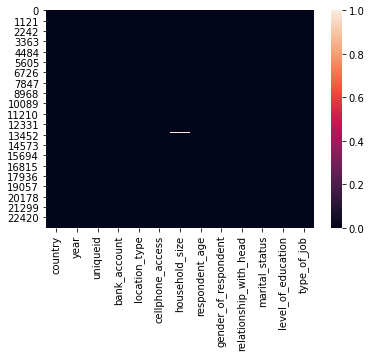

In [141]:
#visualising missing values
sns.heatmap(africa_financials.isnull(), cbar=True)
plt.show()

We have missing values  in the marital status column,  cell phone access,type of location and Has a bank account columns


In [142]:
def look_deeper(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['sample'] = df.iloc[20]
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['percentage duplicates']= df.duplicated().sum()*100/len(df)
        return info.sort_values('data type')

In [143]:

look_deeper(africa_financials)

,sample,data type,percent missing,percentage duplicates
year,2018,int64,0.000000,0.0
household_size,4,float64,0.119027,0.0
respondent_age,26,float64,0.144533,0.0
country,Kenya,object,0.059514,0.0
uniqueid,uniqueid_21,object,0.000000,0.0
bank_account,No,object,0.153035,0.0
location_type,Rural,object,0.063765,0.0
cellphone_access,Yes,object,0.046761,0.0
gender_of_respondent,Male,object,0.144533,0.0
relationship_with_head,Head of Household,object,0.017004,0.0


In [144]:
africa_financials.describe().T

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.979000,0.899669,2016.0,2016.0,2017.0,2018.0,2056.0
household_size,23496.0,3.681818,2.279933,0.0,2.0,3.0,5.0,21.0
respondent_age,23490.0,38.804300,16.519996,16.0,26.0,35.0,49.0,100.0


# Exploratory Data Analysis and Documentation

In [145]:
# from the above we have missing values in our dataset but they are very few so we are going to drop them all 
# as we can see there is barely a column with more than 0.5 percent missing values

africa_financials.dropna(axis=0,inplace=True)

In [146]:
#we will also drop the column unique ID as it has no significance in our analysis 
africa_financials.drop(['uniqueid'],axis=1,inplace=True)

In [147]:
africa_financials.shape

(23343, 12)

In [148]:
#Voila! all our missing values gone
look_deeper(africa_financials)

#But now we have 18% duplicate values ..... well they are really not duplicates .... because we got them after droping the Unique_Id column

,sample,data type,percent missing,percentage duplicates
year,2018,int64,0.0,18.7251
household_size,4,float64,0.0,18.7251
respondent_age,26,float64,0.0,18.7251
country,Kenya,object,0.0,18.7251
bank_account,No,object,0.0,18.7251
location_type,Rural,object,0.0,18.7251
cellphone_access,Yes,object,0.0,18.7251
gender_of_respondent,Male,object,0.0,18.7251
relationship_with_head,Head of Household,object,0.0,18.7251
marital_status,Married/Living together,object,0.0,18.7251


In [149]:
# from the above a house hold of 0.0 size is suspicious 
africa_financials[africa_financials['household_size']==0].country.unique(),africa_financials[africa_financials['household_size']==0].country.count()

(array(['Tanzania'], dtype=object), 36)

In [150]:
#finding the median household size in each country 
africa_financials.groupby('country')['household_size'].median()

country
Kenya       4.0
Rwanda      4.0
Tanzania    2.0
Uganda      5.0
Name: household_size, dtype: float64

In [151]:
# replacing the 0 household with the median for Tanzania since all the 0 household values were from Tanzania
africa_financials.loc[ africa_financials['household_size'] == 0 | np.isnan(africa_financials['household_size']),
                      'household_size' ] = africa_financials[africa_financials.country=='Tanzania'].household_size.median()

In [152]:
africa_financials[africa_financials['household_size']==0].count()

country                   0
year                      0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
respondent_age            0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
level_of_education        0
type_of_job               0
dtype: int64

# Univariate Analysis

Analysis on Numerical variables

In [153]:
age=africa_financials['respondent_age']

In [154]:
h_size=africa_financials['household_size']

In [155]:
age.mean()

38.80550914621085

In [156]:
age.median()

35.0

In [157]:
age.mode()

0    30.0
dtype: float64

In [158]:
age.std()

16.51980349804178

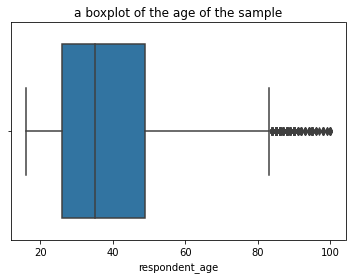

In [159]:
sns.boxplot(age)
plt.title('a boxplot of the age of the sample')
plt.show()

we have outliers there but they are reasonable because  the age range of 80 to 100 is a common one in Africa

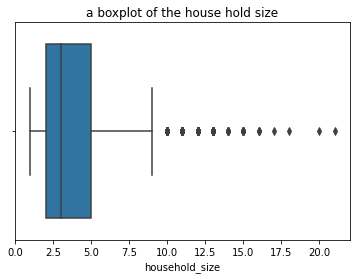

In [160]:
sns.boxplot(h_size)
plt.title('a boxplot of the house hold size')
plt.show()

whe have some outliers but we will leave them put because households of 10 to 20 persons are common in Africa

Analysis of our Categorical variables


1. Country
2. Year
3. Location type
4. Cell phone access
5. Gender
6. Relationship with head
7. Marital Status
8. Education level
9. Job type








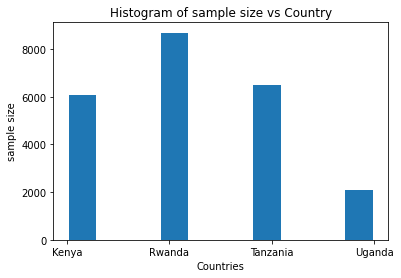

In [161]:
country=africa_financials['country']
plt.hist(country,rwidth=0.9,)
plt.xlabel('Countries')
plt.ylabel('sample size')
plt.title('Histogram of sample size vs Country')
plt.show()

from the above  we notice that a big sample was drawn from Rwanda

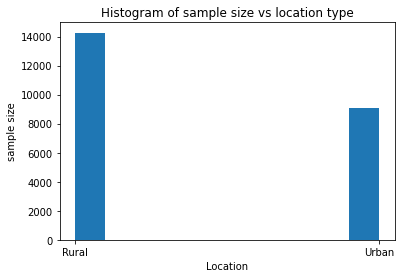

In [162]:
location=africa_financials['location_type']
plt.hist(location)
plt.xlabel('Location')
plt.ylabel('sample size')
plt.title('Histogram of sample size vs location type')
plt.show()

Univariate anylysis on categorical here does not really give use alot of information about our data

# Bivariate Analysis

for this we are going to encode our categorical variables first

In [163]:
le = LabelEncoder()
africa_financials['bank_account'] = le.fit_transform(africa_financials['bank_account'])
africa_financials.head(4)

,country,year,bank_account,location_type,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,1,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private


In [164]:
categ = ['relationship_with_head', 'marital_status', 'level_of_education', 'type_of_job', 'country']

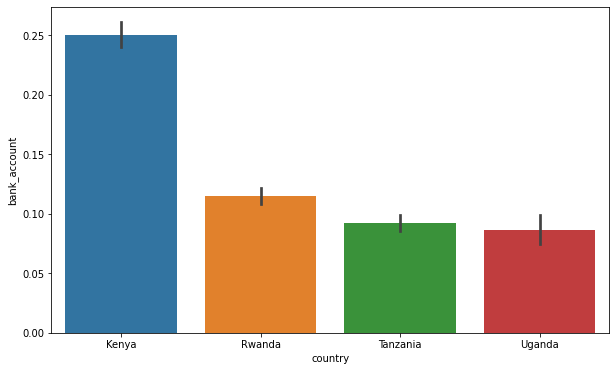

In [165]:

plt.figure(figsize=[10,6])
sns.barplot('country', 'bank_account', data=africa_financials)
plt.show()

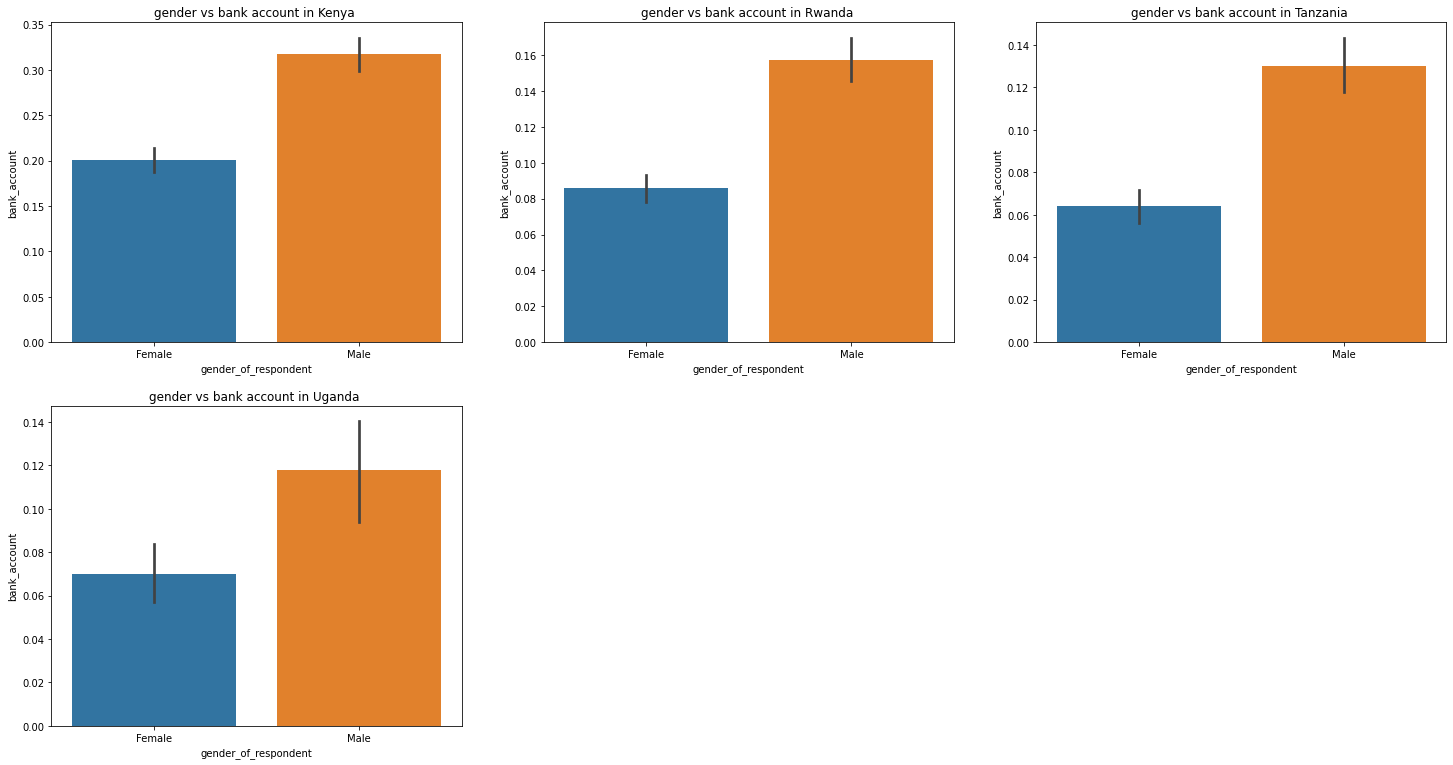

In [166]:
plt.figure(figsize=[25,20])
plt.subplot(331)
sns.barplot('gender_of_respondent', 'bank_account', data=africa_financials[(africa_financials.country=='Kenya')])
plt.title('gender vs bank account in Kenya ')
plt.subplot(332)
sns.barplot('gender_of_respondent', 'bank_account', data=africa_financials[(africa_financials.country=='Rwanda')])
plt.title('gender vs bank account in Rwanda ')
plt.subplot(333)
sns.barplot('gender_of_respondent', 'bank_account', data=africa_financials[(africa_financials.country=='Tanzania')])
plt.title('gender vs bank account in Tanzania ')
plt.subplot(334)
sns.barplot('gender_of_respondent', 'bank_account', data=africa_financials[(africa_financials.country=='Uganda')])
plt.title('gender vs bank account in Uganda ')

plt.show()

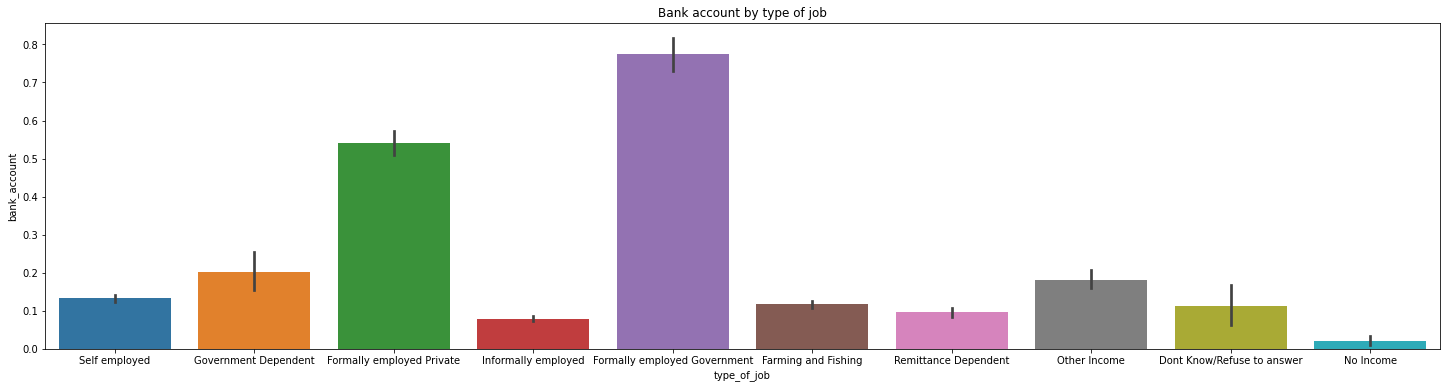

In [167]:
fig=plt.figure(figsize=[25,6])

sns.barplot('type_of_job', 'bank_account', data=africa_financials,)
plt.title('Bank account by type of job')
plt.show()


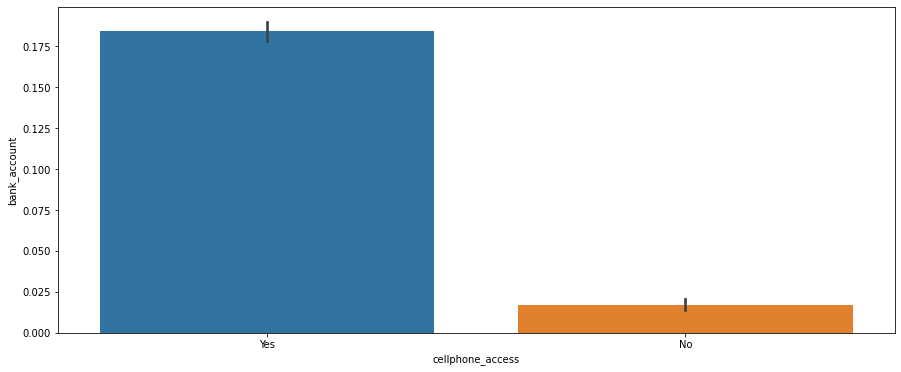

In [168]:
plt.figure(figsize=[15,6])
sns.barplot('cellphone_access', 'bank_account', data=africa_financials)
plt.show()

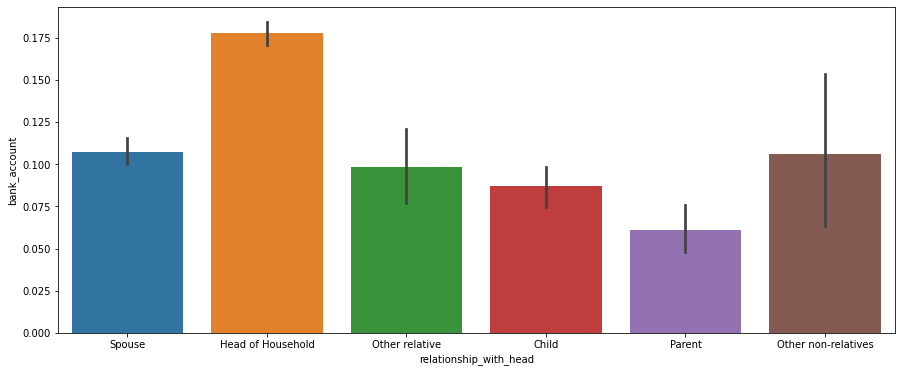

In [169]:

plt.figure(figsize=[15,6])
sns.barplot('relationship_with_head', 'bank_account', data=africa_financials)
plt.show()

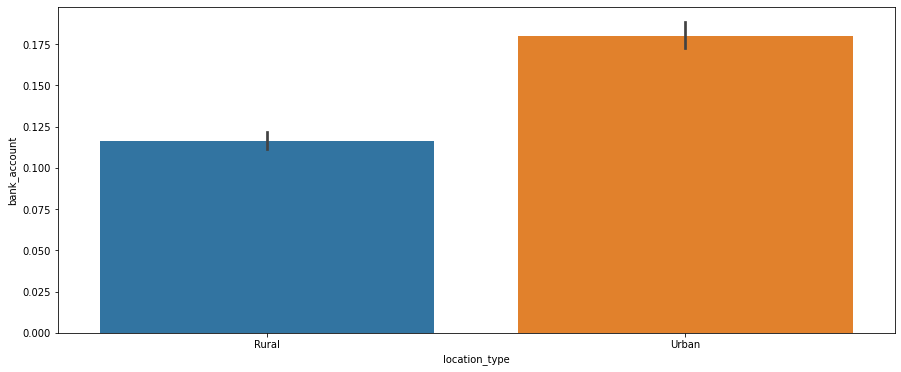

In [170]:

plt.figure(figsize=[15,6])
sns.barplot('location_type', 'bank_account', data=africa_financials)
plt.show()

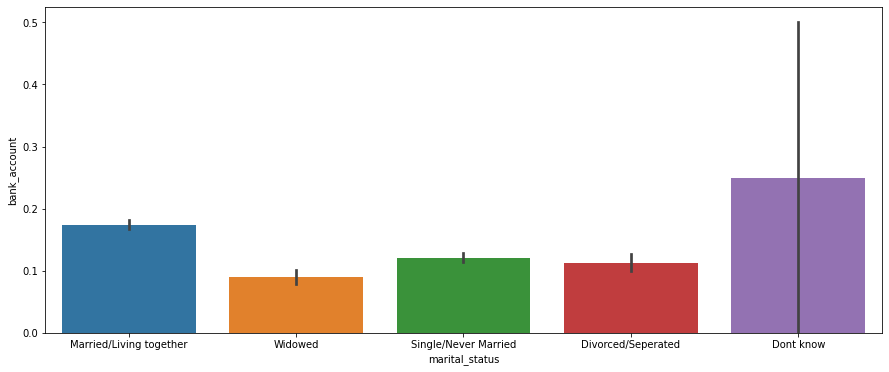

In [171]:
plt.figure(figsize=[15,6])
sns.barplot('marital_status', 'bank_account', data=africa_financials)
plt.show()

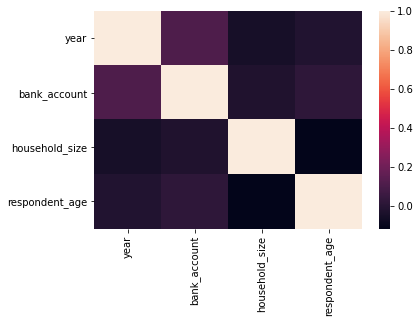

In [172]:
sns.heatmap(africa_financials.corr())

changing the variables using encoding

In [173]:
africa_financials['relationship_with_head'] = le.fit_transform(africa_financials['relationship_with_head'])

africa_financials['country'] = le.fit_transform(africa_financials['country'])

africa_financials['marital_status'] = le.fit_transform(africa_financials['marital_status'])

africa_financials['location_type'] = le.fit_transform(africa_financials['location_type'])

africa_financials['cellphone_access'] = le.fit_transform(africa_financials['cellphone_access'])

africa_financials['gender_of_respondent'] = le.fit_transform(africa_financials['gender_of_respondent'])

africa_financials['level_of_education'] = le.fit_transform(africa_financials['level_of_education'])

africa_financials['type_of_job'] = le.fit_transform(africa_financials['type_of_job'])

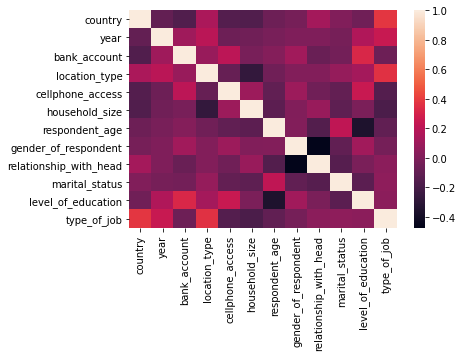

In [174]:
sns.heatmap(africa_financials.corr())
plt.show()

# Multivariate Analysis

Using Factor Analysis

In [175]:


from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(africa_financials)
chi_square_value, p_value

(34823.32889381001, 0.0)

In [176]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(africa_financials)

In [177]:
kmo_all

,KMO
country,0.548482
year,0.510157
bank_account,0.606860
location_type,0.669117
cellphone_access,0.719108
household_size,0.646055
respondent_age,0.528258
gender_of_respondent,0.482884
relationship_with_head,0.484181
marital_status,0.540207


In [178]:
kmo_model

0.5672147886036324

In [179]:
from factor_analyzer import FactorAnalyzer

In [180]:
fa = FactorAnalyzer()
fa.analyze(africa_financials, 12, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,1.955384
1,1.826229
2,1.587535
3,1.183388
4,1.008232
5,0.858829
6,0.779016
7,0.726889
8,0.662710
9,0.521371


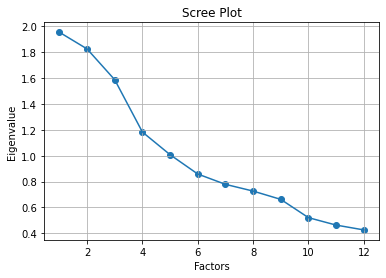

In [181]:
# Creating a scree plot using matplotlib
#
plt.scatter(range(1,africa_financials.shape[1]+1),ev)
plt.plot(range(1,africa_financials.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [182]:
fa = FactorAnalyzer()
fa.analyze(africa_financials, 5, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
country,0.482340,-0.043903,0.130349,-0.151819,-0.274627
year,0.152867,-0.003430,0.032628,0.981873,0.082729
bank_account,-0.011602,0.077341,-0.051601,0.076196,0.507568
location_type,0.543869,-0.004078,-0.087728,0.124142,0.130767
cellphone_access,-0.172086,0.061498,0.137903,-0.068118,0.368046
household_size,-0.385452,-0.031146,0.266735,0.009533,-0.051164
respondent_age,-0.106653,0.104352,-0.584762,0.022449,-0.155247
gender_of_respondent,0.007120,0.985282,0.151226,-0.006319,0.071266
relationship_with_head,0.026806,-0.503740,0.238939,-0.003317,-0.110857
marital_status,0.103212,-0.012930,-0.389306,-0.022322,-0.041046


In [183]:
#Getting variance of each factors

fa.get_factor_variance().T

,SS Loadings,Proportion Var,Cumulative Var
Factor1,1.223189,0.101932,0.101932
Factor2,1.249598,0.104133,0.206066
Factor3,0.827255,0.068938,0.275004
Factor4,1.043279,0.086940,0.361943
Factor5,0.985811,0.082151,0.444094


# Modeling

In [184]:
africa_financials.head()

,country,year,bank_account,location_type,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,0,2018,1,0,1,3.0,24.0,0,5,2,4,9
1,0,2018,0,0,0,5.0,70.0,0,1,4,1,4
2,0,2018,1,1,1,5.0,26.0,1,3,3,6,9
3,0,2018,0,0,1,5.0,34.0,0,1,2,3,3
4,0,2018,0,1,0,8.0,26.0,1,0,3,3,5


In [185]:
africa_financials.dtypes

country                     int64
year                        int64
bank_account                int64
location_type               int64
cellphone_access            int64
household_size            float64
respondent_age            float64
gender_of_respondent        int64
relationship_with_head      int64
marital_status              int64
level_of_education          int64
type_of_job                 int64
dtype: object

In [186]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [187]:
X = africa_financials.drop('bank_account', 1)
y = africa_financials['bank_account']

In [188]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [189]:
from sklearn.ensemble import RandomForestClassifier

rd = RandomForestClassifier(n_estimators=500)
rd.fit(X_train, y_train)
RdForestperfmce = round(rd.score(X_train, y_train) * 100, 2)
print("Accuracy with Random Forest : {}".format(RdForestperfmce))

Accuracy with Random Forest : 98.03


From the above we have made a model that can predict with 98.03 accurracy if an individual will have a bank account or not 

I dont understand alot in this .... I am just but a biginner ...But i will sure revisit this to correct my mistakes and maybe improve the model